# Topic 1: Some facts about economic growth

This lecture provide a summary of basic empirical facts that we will study in this course. This Jupyter Notebook reproduces all graphs used in the lecture slides. It relies on the <tt>Pandas</tt> library in Python to download data from various economic databases.

In [1]:
# render graphs within notebook
%matplotlib inline
# import relevant packages
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime

# load econutil package with some frequently used functions
import econutil as ec

Root package econutil imported.


In [2]:
today = datetime.date.today().strftime('%d %B %Y')
print('Last update:',today)

Last update: 29 August 2024


# U.S. Gross Domestic Product

U.S. GDP data from the <a href="https://fred.stlouisfed.org/">FRED database</a> at the Federal Reserve Bank of St. Louis.

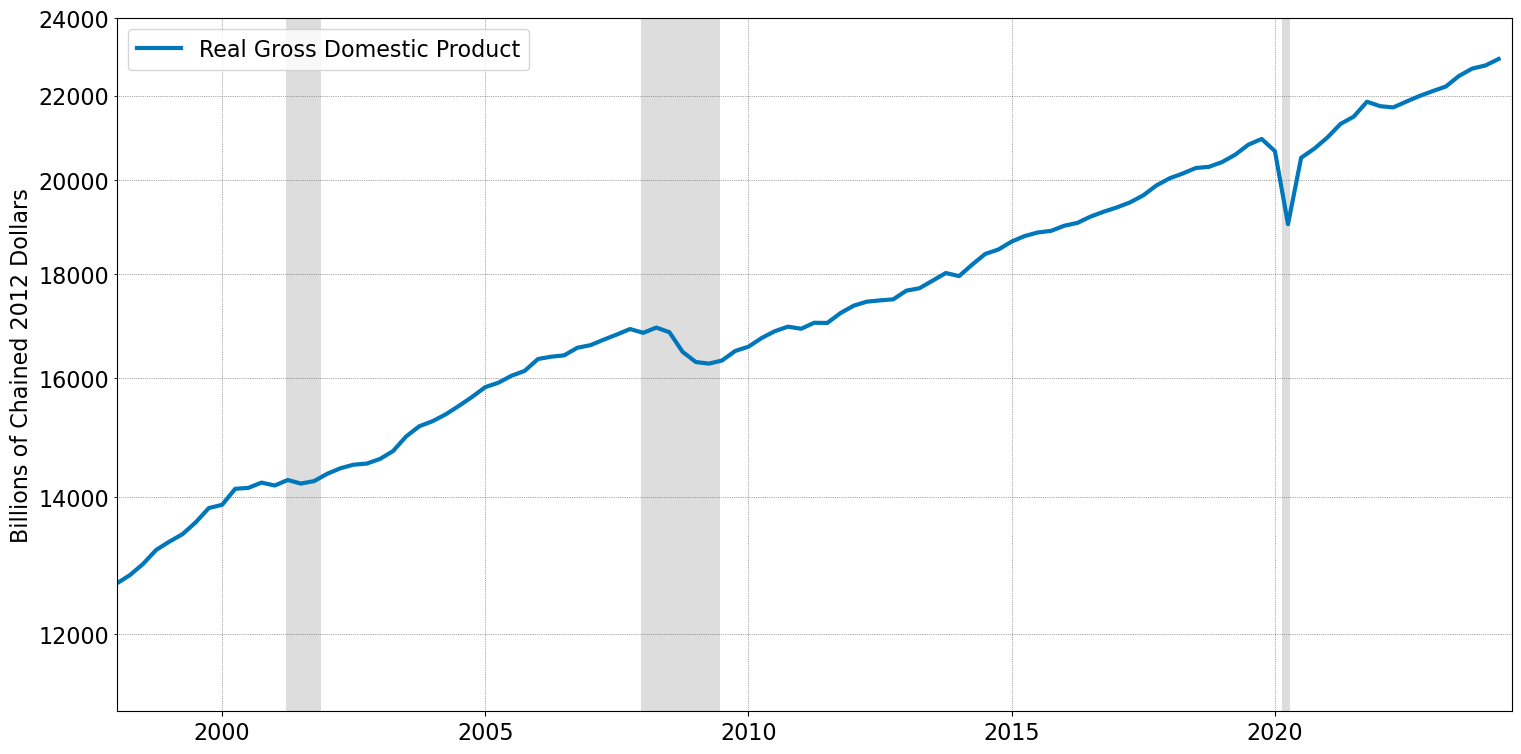

In [3]:
# real GDP
data = ec.LoadDataFRED(series=['GDPC1'],transform='none')

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1998,2024.5], 'ylim': [11000,24000],
         'xlabel': '', 'ylabel': 'Billions of Chained 2012 Dollars',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [11000,24000]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['GDPC1'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Real Gross Domestic Product')
x = ax.legend(loc='upper left')

In [4]:
# real GDP growth rate
data = ec.LoadDataFRED(series=['GDPC1'],transform='pct_change_year_ago')

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1948,2024.5], 'ylim': [-10,15],
         'xlabel': '', 'ylabel': 'Percent Change from Year Ago',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-10,15]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['GDPC1'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Real Gross Domestic Product')
x = ax.legend(loc='lower left')

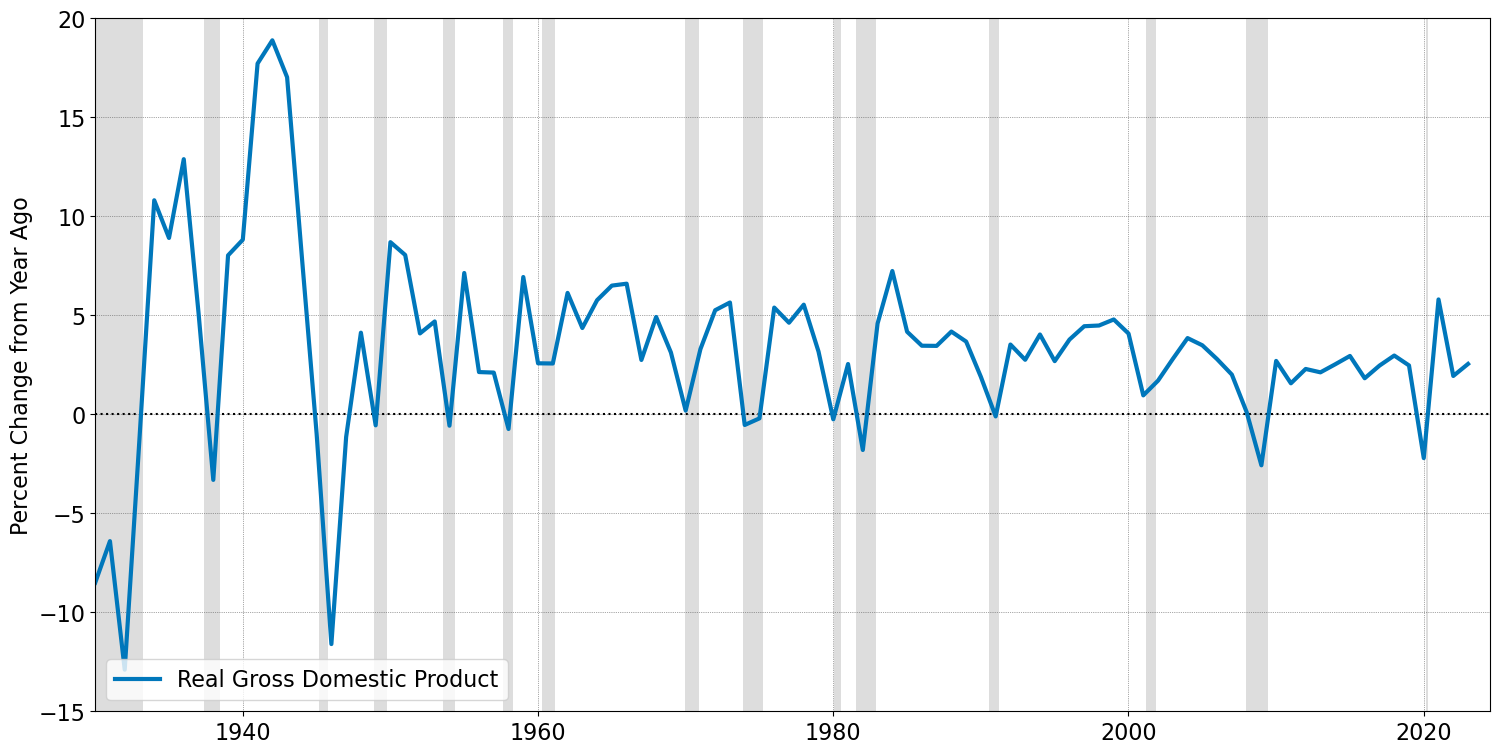

In [5]:
# real GDP growth rate, annual data over a longer sample
data = ec.LoadDataFRED(series=['GDPCA'],transform='pct_change_year_ago')

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1930,2024.5], 'ylim': [-15,20],
         'xlabel': '', 'ylabel': 'Percent Change from Year Ago',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-15,20]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['GDPCA'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Real Gross Domestic Product')
x = ax.legend(loc='lower left')

# Unemployment

U.S. unemployment data from the <a href="https://fred.stlouisfed.org/">FRED database</a> at the Federal Reserve Bank of St. Louis.

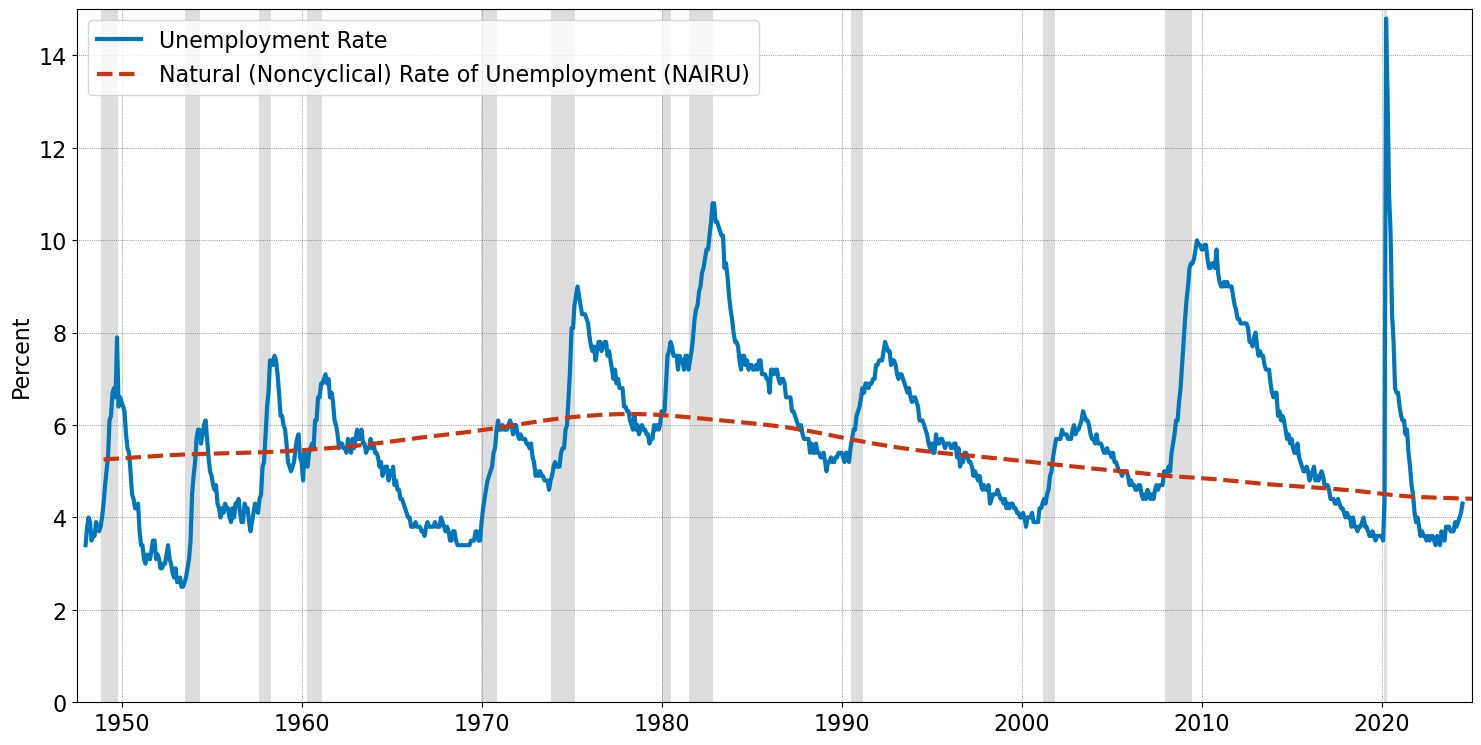

In [6]:
data = ec.LoadDataFRED(series=['UNRATE'],transform='none')
data_nairu = ec.LoadDataFRED(series=['NROU'],transform='none')

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1947.5,2025], 'ylim': [0,15],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,15]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['UNRATE'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Unemployment Rate')
ax.plot(data_nairu['year'],data_nairu['NROU'],
                    '--',linewidth=3,marker='',color=ec.tolColor['tolVibrantRed'],label='Natural (Noncyclical) Rate of Unemployment (NAIRU)')
#ax.plot([data['year'][0],data['year'][-1]],[5,5],'--',linewidth=3,color=ec.tolColor['tolVibrantRed'])
x = ax.legend(loc='upper left')

# Inflation

U.S. inflation data from the <a href="https://fred.stlouisfed.org/">FRED database</a> at the Federal Reserve Bank of St. Louis.

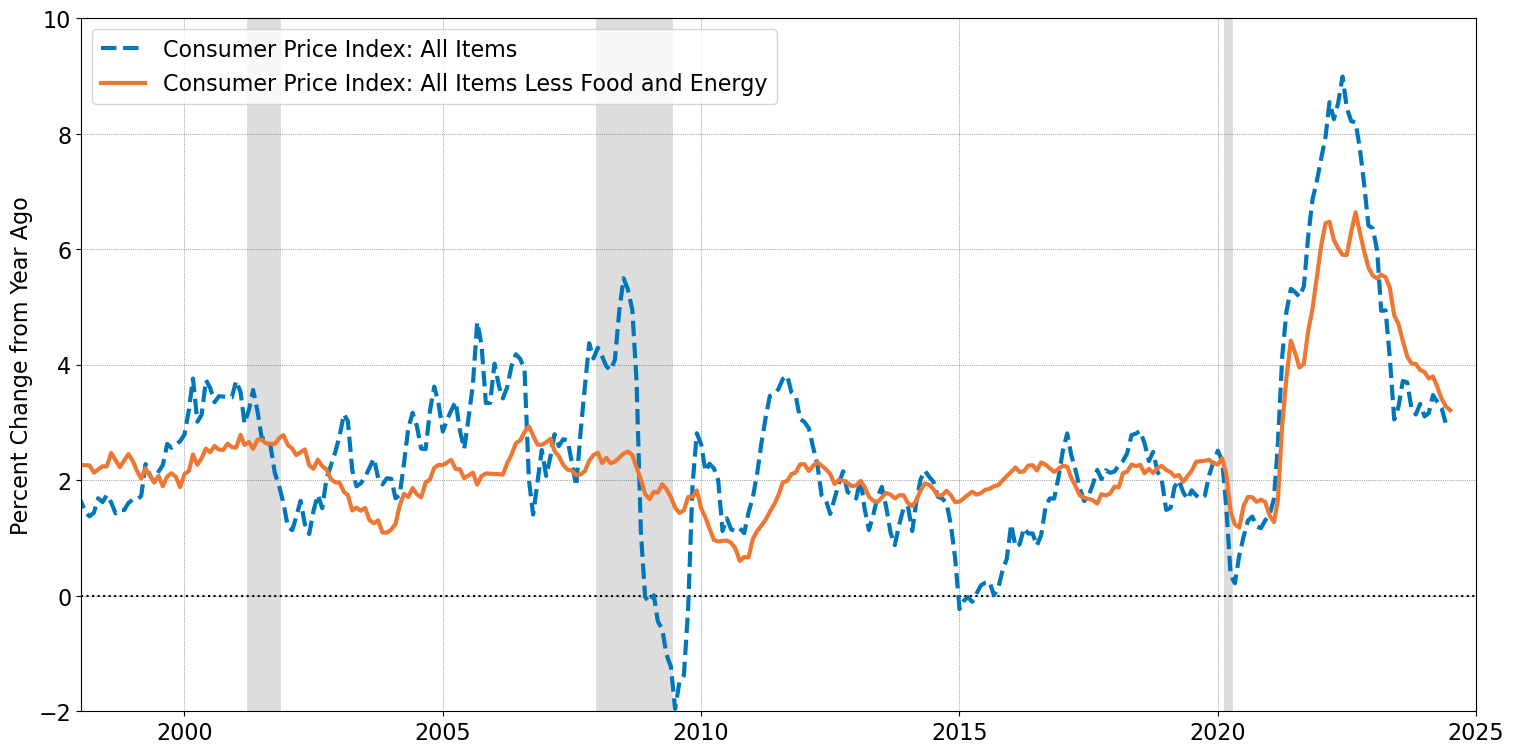

In [7]:
# inflation (increase in CPI) and core inflation
data = ec.LoadDataFRED(series=['CPIAUCSL','CPILFESL'],transform='pct_change_year_ago')

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1998,2025], 'ylim': [-2,10],
         'xlabel': '', 'ylabel': 'Percent Change from Year Ago',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-2,10]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['CPIAUCSL'],
                    '--',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Consumer Price Index: All Items')
ax.plot(data['year'],data['CPILFESL'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Consumer Price Index: All Items Less Food and Energy')
x = ax.legend(loc='upper left')

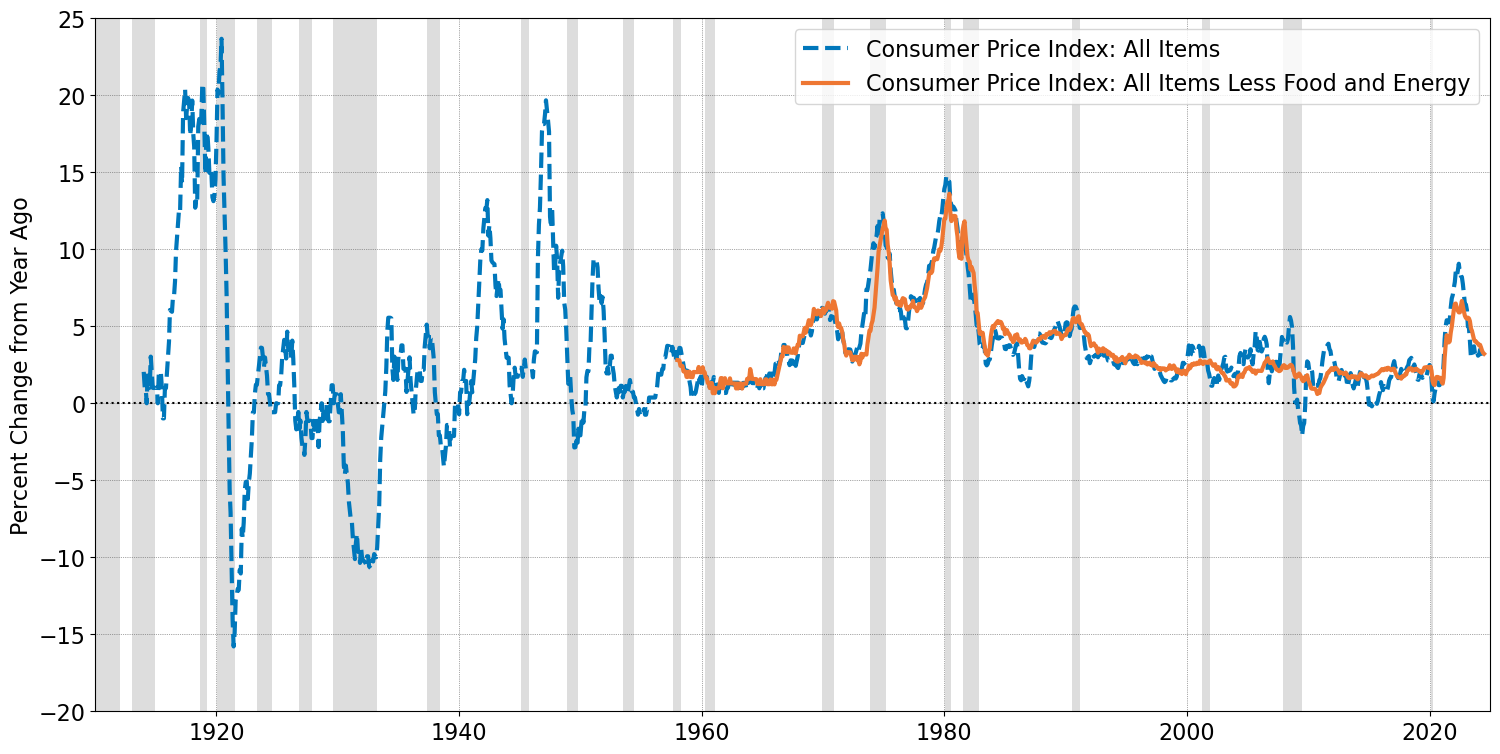

In [8]:
# inflation data over a longer sample
data = ec.LoadDataFRED(series=['CPIAUCNS','CPILFESL'],transform='pct_change_year_ago')

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1910,2025], 'ylim': [-20,25],
         'xlabel': '', 'ylabel': 'Percent Change from Year Ago',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-20,25]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['CPIAUCNS'],
                    '--',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Consumer Price Index: All Items')
ax.plot(data['year'],data['CPILFESL'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Consumer Price Index: All Items Less Food and Energy')
x = ax.legend(loc='upper right')

# Monetary policy

Interest rate data from the <a href="https://fred.stlouisfed.org/">FRED database</a> at the Federal Reserve Bank of St. Louis.

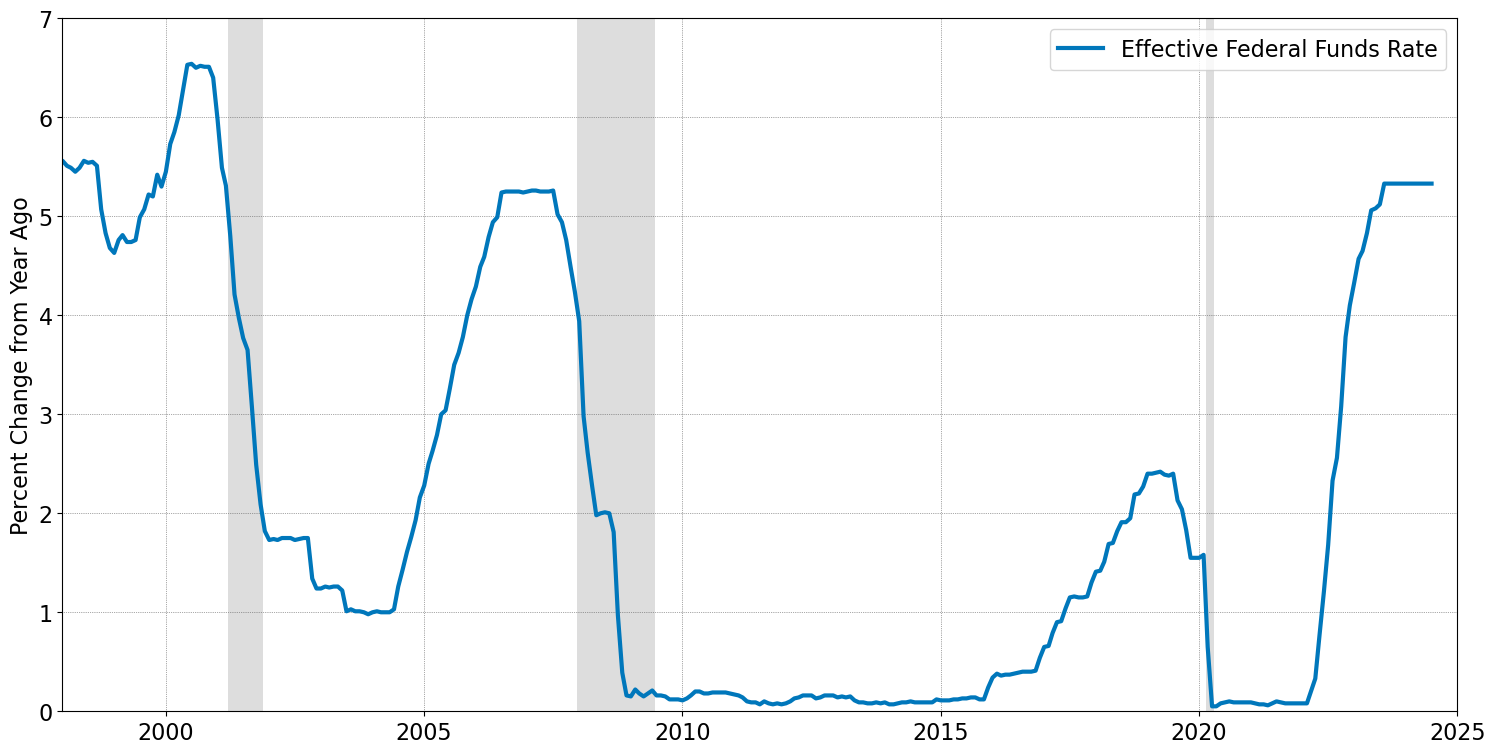

In [9]:
data = ec.LoadDataFRED(series=['FEDFUNDS'],transform='none')

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1998,2025], 'ylim': [0,7],
         'xlabel': '', 'ylabel': 'Percent Change from Year Ago',
         'ylogscale': False,
         'showgrid': True,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,7]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['FEDFUNDS'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Effective Federal Funds Rate')
x = ax.legend(loc='upper right')

<a href="https://www.clevelandfed.org/~/media/files/webcharts/crediteasing/crediteasingbalancesheet.xls">Federal Reserve balance sheet data</a> from the Federal Reserve Bank of Cleveland.

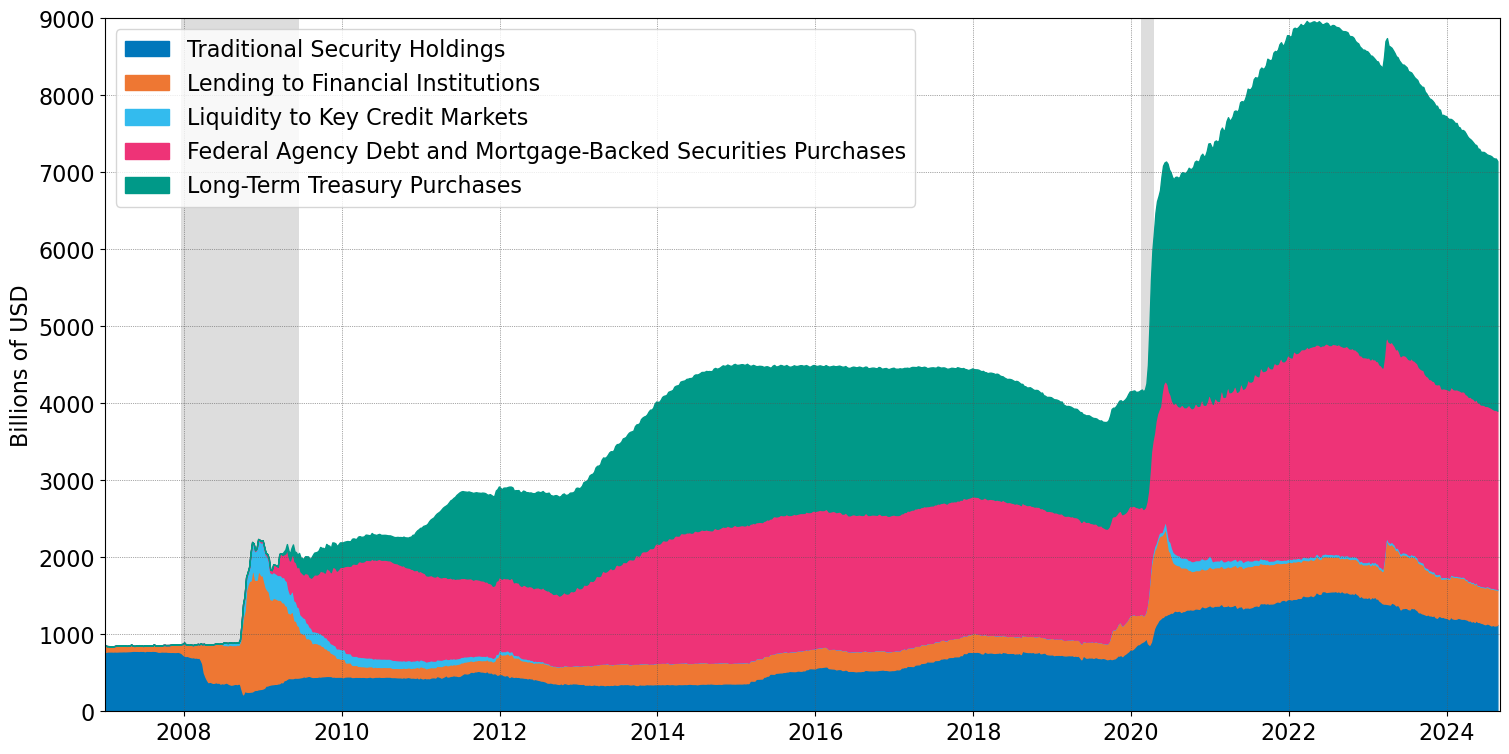

In [10]:
# load and process the spreadsheet
data_Clev_orig = pd.read_excel('https://www.clevelandfed.org/~/media/files/webcharts/crediteasing/crediteasingbalancesheet.xls',sheet_name="Chart Data")
data_Clev_orig.columns = data_Clev_orig.iloc[0,:]
data_Clev_orig = data_Clev_orig.iloc[1:,:]
data_Clev_orig = data_Clev_orig.set_index('Date')
dates = ec.year_frac(data_Clev_orig.index)
T = len(dates)

# keep only relevant columns, and convert to float
data_columns = ['Traditional Security Holdings','Lending to Financial Institutions',
                'Liquidity to Key Credit Markets','Federal Agency Debt and Mortgage-Backed Securities Purchases',
                'Long-Term Treasury Purchases']
data_Clev_orig = data_Clev_orig[data_columns]
data_Clev_orig = data_Clev_orig.astype('float64')

# change index to numerical years if needed
# data_Clev_orig.reset_index(drop=True,inplace=True)
# data_Clev_orig['date_num'] = dates
# data_Clev_orig = data_Clev_orig.set_index('date_num')

param = {'title': '', 'figsize' : [18,9],
         'xlim': [2007,2024.67], 'ylim': [0,9000],
         'xlabel': '', 'ylabel': 'Billions of USD',
         'ylogscale': False,
         'showgrid': True,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,9000]}

fig,ax = ec.GenerateTSPlot(param)

import matplotlib.patches as mpatches
cumval = np.zeros(T) + data_Clev_orig[data_columns[0]]*0.0

legend_patches = []
for ind,lab in enumerate(data_columns):
    cumvalinc = cumval + data_Clev_orig[lab].to_numpy()/1000
    ax.fill_between(dates,cumval,cumvalinc,color=ec.clist_vibrant[ind])
    cumval = cumvalinc
    legend_patches.append(mpatches.Patch(color=ec.clist_vibrant[ind],label=data_Clev_orig[lab].name))

ax.legend(handles=legend_patches,loc='upper left');

# alternative way of plotting the same data using the data.plot.area function
#ax = data_Clev_orig.plot.area(color=[ec.tolColor['tolVibrantBlue'],
#                           ec.tolColor['tolVibrantOrange'],
#                           ec.tolColor['tolVibrantCyan'],
#                           ec.tolColor['tolVibrantMagenta'],
#                           ec.tolColor['tolVibrantTeal']],
#                    linewidth=0)
#ax.grid(color=ec.tolColor['tolPaleGrey'],linestyle=':')

# Fiscal policy

## FRED

Federal government finance data from the <a href="https://fred.stlouisfed.org/">FRED database</a> at the Federal Reserve Bank of St. Louis.

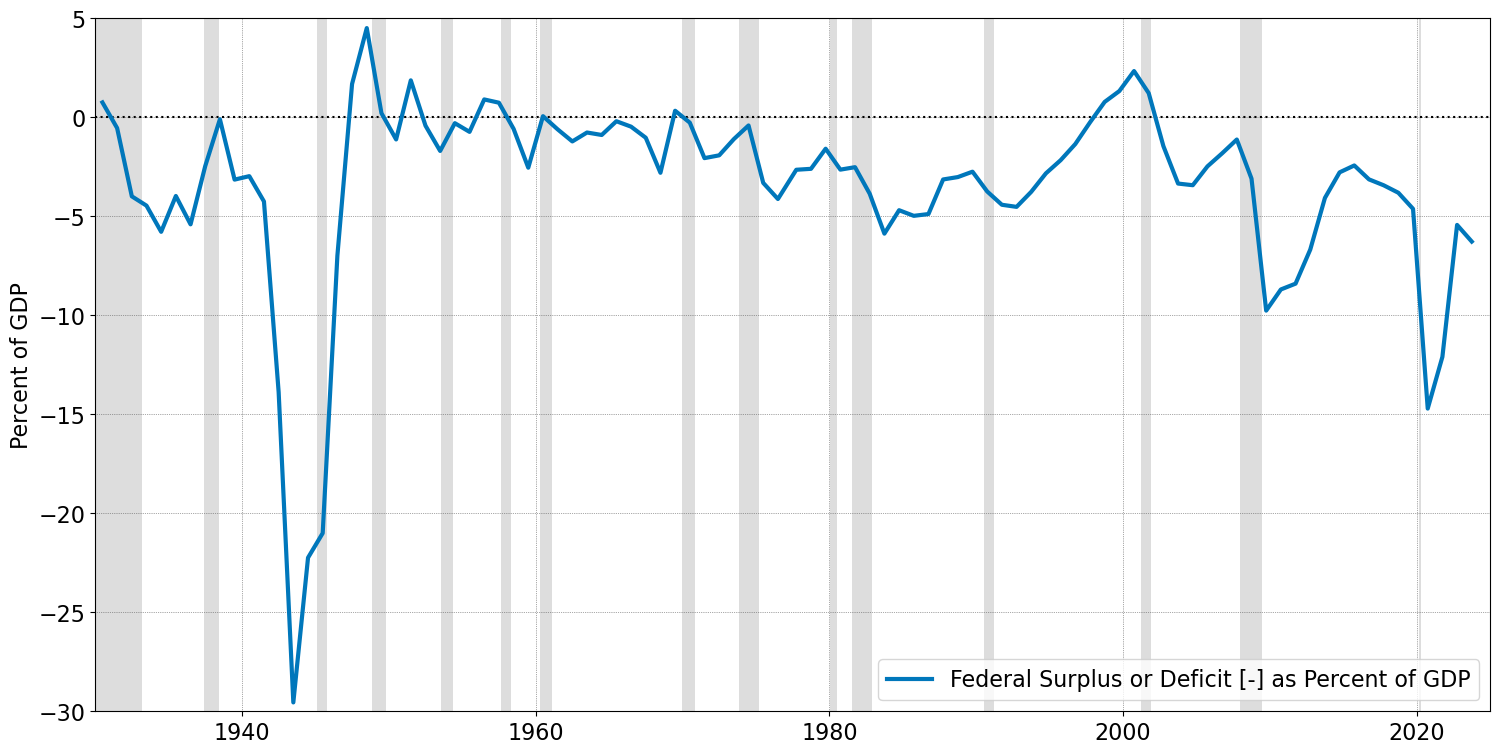

In [11]:
data = ec.LoadDataFRED(series=['FYFSDFYGDP'],transform='none')

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1930,2025], 'ylim': [-30,5],
         'xlabel': '', 'ylabel': 'Percent of GDP',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-30,5]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['FYFSDFYGDP'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Federal Surplus or Deficit [-] as Percent of GDP')
x = ax.legend(loc='lower right')

Composition of government debt, a discussion on constructing relevant measures of government debt held by public see <a href="https://fredblog.stlouisfed.org/2019/12/a-lesson-in-measuring-the-federal-debt/">this note</a> by researchers at the Federal Reserve Bank of St. Louis.

In [12]:
data = ec.LoadDataFRED(series=['GFDEGDQ188S','FYGFGDQ188S','HBFRGDQ188S'],transform='none')
# Federal Debt: Total Public Debt as Percent of Gross Domestic Product (GFDEGDQ188S)
# Federal Debt Held by the Public as Percent of Gross Domestic Product (FYGFGDQ188S)
# Federal Debt Held by Federal Reserve Banks as Percent of Gross Domestic Product (HBFRGDQ188S)

param = {'title': 'Composition of Federal Debt', 'figsize' : [18,9],
         'xlim': [1970,data['year'][-1]], 'ylim': [0,140],
         'xlabel': '', 'ylabel': 'Percent of GDP',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,140]}

fig,ax = ec.GenerateTSPlot(param)

data_proc = dict()
data_proc['Federal Debt Held by Public (excl. Fed)'] = data['FYGFGDQ188S']-data['HBFRGDQ188S'] # excludes debt held by the Fed
data_proc['Federal Debt Held by Federal Reserve'] = data['HBFRGDQ188S']
data_proc['Federal Debt Held by Government Agencies'] = data['GFDEGDQ188S']-data['FYGFGDQ188S']

import matplotlib.patches as mpatches
T = len(data['year'])
cumval = np.zeros(T)
legend_patches = []
for ind,lab in enumerate(data_proc):
    ax.fill_between(data['year'],cumval,cumval+data_proc[lab],color=ec.clist_vibrant[ind])
    cumval = cumval+data_proc[lab]
    legend_patches.append(mpatches.Patch(color=ec.clist_vibrant[ind],label=lab))

ax.legend(handles=legend_patches,loc='upper left');

Government current receipts, expenditures, and surplus/deficit (net saving)

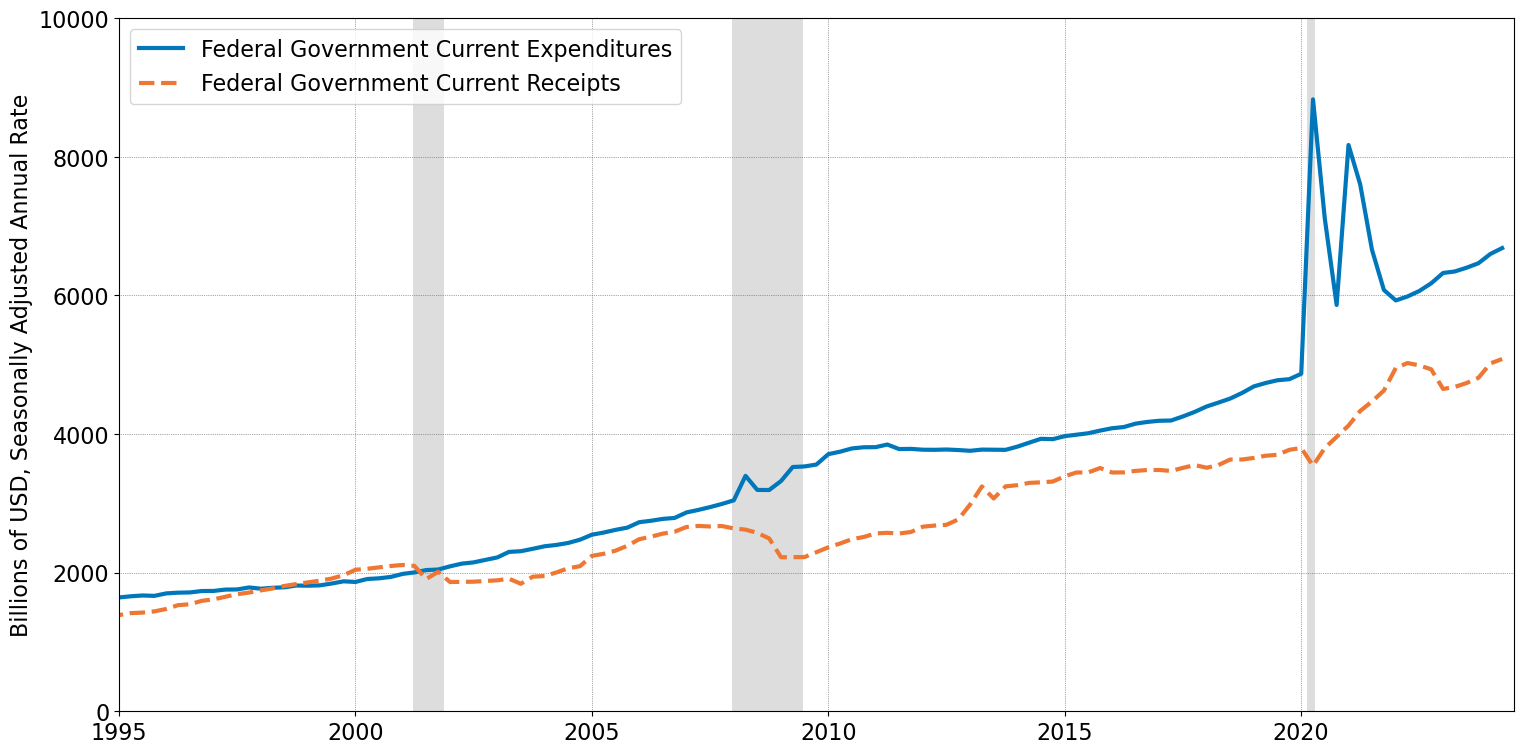

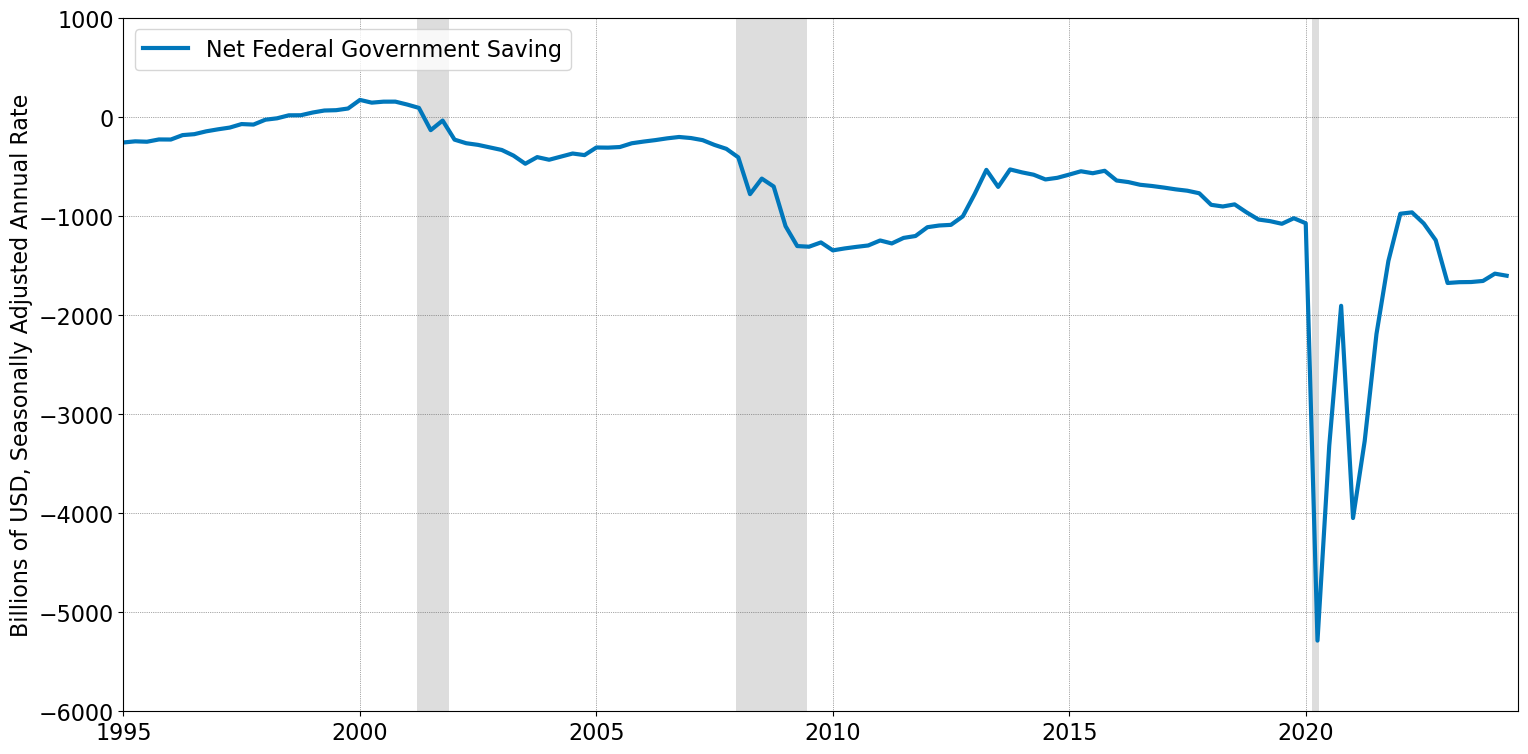

In [13]:
data = ec.LoadDataFRED(series=['FGEXPND','FGRECPT'],transform='none')

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1995,2024.5], 'ylim': [0,10000],
         'xlabel': '', 'ylabel': 'Billions of USD, Seasonally Adjusted Annual Rate',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-6000,10000]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['FGEXPND'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Federal Government Current Expenditures')
ax.plot(data['year'],data['FGRECPT'],
                    '--',linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Federal Government Current Receipts')
x = ax.legend(loc='upper left')

fig2,ax2 = ec.GenerateTSPlot(param)

ax2.plot(data['year'],data['FGRECPT']-data['FGEXPND'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Net Federal Government Saving')
ax2.set_ylim([-6000,1000])                    
x = ax2.legend(loc='upper left')

### Composition of government revenue and expenditures

Data in the preceding two graphs include only current receipts and expenditures, which includes some smaller items in the government finances. Here, we take a closer look at these items. The data originate from NIPA tables constructed by the Bureau of Economic Anaysis, and reported both as seasonally adjusted and not seasonally adjusted.

<b>Data</b>: <i>BEA, NIPA, Table 3.2. Federal Government Current Receipts and Expenditures: Quarterly</i>

Quarterly data, Billions of Dollars, Seasonally Adjusted Annual Rate
 
<b>Net lending or net borrowing (-)</b> [AD02RC1Q027SBEA](https://fred.stlouisfed.org/series/AD02RC1Q027SBEA) = <b>Total receipts</b> [W018RC1Q027SBEA](https://fred.stlouisfed.org/series/W018RC1Q027SBEA) - <b>Total expenditures</b> [W019RCQ027SBEA](https://fred.stlouisfed.org/series/W019RCQ027SBEA)
 
<b>Total receipts</b> [W018RC1Q027SBEA](https://fred.stlouisfed.org/series/W018RC1Q027SBEA) = Current receipts [FGRECPT](https://fred.stlouisfed.org/series/FGRECPT) + Capital transfer receipts [B232RC1Q027SBEA](https://fred.stlouisfed.org/series/B232RC1Q027SBEA)

<b>Total expenditures</b> [W019RCQ027SBEA](https://fred.stlouisfed.org/series/W019RCQ027SBEA) = Current expenditures [FGEXPND](https://fred.stlouisfed.org/series/FGEXPND) + Gross government investment [A787RC1Q027SBEA](https://fred.stlouisfed.org/series/A787RC1Q027SBEA) +  Capital transfer payments [W020RC1Q027SBEA](https://fred.stlouisfed.org/series/W020RC1Q027SBEA) + Net purchases of nonproduced assets [AD08RC1Q027SBEA](https://fred.stlouisfed.org/series/AD08RC1Q027SBEA) - Consumption of fixed capital [A918RC1Q027SBEA](https://fred.stlouisfed.org/series/A918RC1Q027SBEA)

<b>Data</b>: <i>Table 8.3. Federal Government Current Receipts and Expenditures, Not Seasonally Adjusted, Quarterly</i>

Quarterly data, Millions of Dollars, Not Seasonally Adjusted 
 
<b>Net federal government saving</b> [NA000314Q](https://fred.stlouisfed.org/series/NA000314Q) = <b>Current receipts</b> [NA000304Q](https://fred.stlouisfed.org/series/NA000304Q) - <b>Current expenditures</b> [NA000283Q](https://fred.stlouisfed.org/series/NA000283Q)

Addenda: Gross government investment [NA000292Q](https://fred.stlouisfed.org/series/NA000292Q), Consumption of fixed capital [NA000281Q](https://fred.stlouisfed.org/series/NA000281Q)


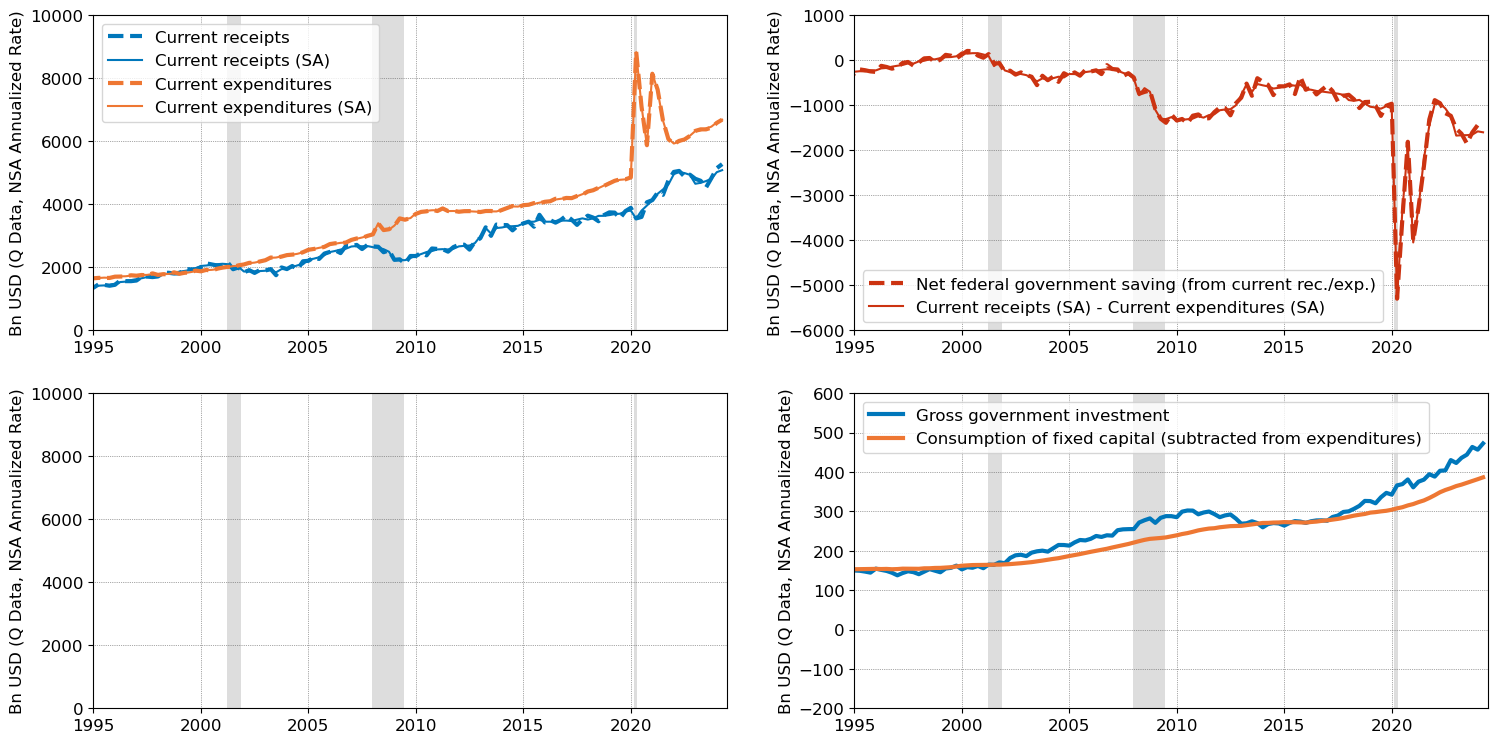

In [14]:
data_sa = ec.LoadDataFRED(series=['AD02RC1Q027SBEA','W018RC1Q027SBEA','W019RCQ027SBEA','FGRECPT','B232RC1Q027SBEA','FGEXPND','A787RC1Q027SBEA','W020RC1Q027SBEA','AD08RC1Q027SBEA','A918RC1Q027SBEA'],transform='none')
data_nsa = ec.LoadDataFRED(series=['NA000314Q','NA000304Q','NA000283Q','NA000292Q','NA000281Q'],transform='none')

# param = {'title': '', 'figsize' : [18,9],
#          'xlim': [1995,2024.5], 'ylim': [0,10000],
#          'xlabel': '', 'ylabel': 'Billions of USD (Quarterly Data, Annualized Rate)',
#          'ylogscale': False,
#          'showgrid': True, 'highlightzero': False,
#          'showNBERrecessions': True, 'showNBERrecessions_y': [0,10000]}

# fig,ax = ec.GenerateTSPlot(param)

# ax.plot(data['year'],data['FGEXPND'],
#                     '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Federal Government Current Expenditures')
# ax.plot(data['year'],data['FGRECPT'],
#                     '--',linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Federal Government Current Receipts')
# x = ax.legend(loc='upper left')

param = {'title': '', 'figsize' : [18,9], 'fontsize': 12, 'subplots': [2,2],
         'xlim': [1995,2024.5], 'ylim': [0,10000],
         'xlabel': '', 'ylabel': 'Bn USD (Q Data, SA Annualized Rate)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-6000,10000]}

fig_sa,ax_sa = ec.GenerateTSPlot(param)

ax_sa[0,0].plot(data_sa['year'],data_sa['W018RC1Q027SBEA'],
                    '-',linewidth=1.5,marker='',color=ec.tolColor['tolVibrantBlue'],label='Total receipts')
ax_sa[0,0].plot(data_sa['year'],data_sa['FGRECPT'],
                    '--',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Current receipts')
ax_sa[0,0].plot(data_sa['year'],data_sa['W019RCQ027SBEA'],
                    '-',linewidth=1.5,marker='',color=ec.tolColor['tolVibrantOrange'],label='Total expenditures')
ax_sa[0,0].plot(data_sa['year'],data_sa['FGEXPND'],
                    '--',linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Current expenditures')
x = ax_sa[0,0].legend(loc='upper left')

ax_sa[0,1].plot(data_sa['year'],data_sa['AD02RC1Q027SBEA'],
                    '-',linewidth=1.5,marker='',color=ec.tolColor['tolVibrantRed'],label='Net lending or net borrowing (-)')
ax_sa[0,1].plot(data_sa['year'],data_sa['FGRECPT']-data_sa['FGEXPND'],
                    '--',linewidth=3,marker='',color=ec.tolColor['tolVibrantRed'],label='Current receipts - Current expenditures')
ax_sa[0,1].set_ylim([-6000,1000])
x = ax_sa[0,1].legend(loc='lower left')

ax_sa[1,0].plot(data_sa['year'],data_sa['B232RC1Q027SBEA'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Capital transfer receipts')
ax_sa[1,0].plot(data_sa['year'],data_sa['W020RC1Q027SBEA'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Capital transfer payments')
ax_sa[1,0].set_ylim([0,1000])
x = ax_sa[1,0].legend(loc='upper left')

ax_sa[1,1].plot(data_sa['year'],data_sa['A787RC1Q027SBEA'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Gross government investment')
ax_sa[1,1].plot(data_sa['year'],data_sa['A918RC1Q027SBEA'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Consumption of fixed capital (subtracted from expenditures)')
ax_sa[1,1].plot(data_sa['year'],data_sa['AD08RC1Q027SBEA'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantTeal'],label='Net purchases of nonproduced assets')
ax_sa[1,1].set_ylim([-200,600])
x = ax_sa[1,1].legend(loc='upper left')

param = {'title': '', 'figsize' : [18,9], 'fontsize': 12, 'subplots': [2,2],
         'xlim': [1995,2024.5], 'ylim': [0,10000],
         'xlabel': '', 'ylabel': 'Bn USD (Q Data, NSA Annualized Rate)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-6000,10000]}

fig_nsa,ax_nsa = ec.GenerateTSPlot(param)

ax_nsa[0,0].plot(data_nsa['year'],data_nsa['NA000304Q']/1000*4,
                    '--',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Current receipts')
ax_nsa[0,0].plot(data_sa['year'],data_sa['FGRECPT'],
                    '-',linewidth=1.5,marker='',color=ec.tolColor['tolVibrantBlue'],label='Current receipts (SA)')
ax_nsa[0,0].plot(data_nsa['year'],data_nsa['NA000283Q']/1000*4,
                    '--',linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Current expenditures')
ax_nsa[0,0].plot(data_sa['year'],data_sa['FGEXPND'],
                    '-',linewidth=1.5,marker='',color=ec.tolColor['tolVibrantOrange'],label='Current expenditures (SA)')
x = ax_nsa[0,0].legend(loc='upper left')

ax_nsa[0,1].plot(data_nsa['year'],data_nsa['NA000314Q']/1000*4,
                    '--',linewidth=3,marker='',color=ec.tolColor['tolVibrantRed'],label='Net federal government saving (from current rec./exp.)')
ax_nsa[0,1].plot(data_sa['year'],data_sa['FGRECPT']-data_sa['FGEXPND'],
                    '-',linewidth=1.5,marker='',color=ec.tolColor['tolVibrantRed'],label='Current receipts (SA) - Current expenditures (SA)')
ax_nsa[0,1].set_ylim([-6000,1000])
x = ax_nsa[0,1].legend(loc='lower left')

ax_nsa[1,1].plot(data_nsa['year'],data_nsa['NA000292Q']/1000*4,
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Gross government investment')
ax_nsa[1,1].plot(data_nsa['year'],data_nsa['NA000281Q']/1000*4,
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Consumption of fixed capital (subtracted from expenditures)')
ax_nsa[1,1].set_ylim([-200,600])
x = ax_nsa[1,1].legend(loc='upper left')

## Congressional Budget Office
Historical debt data by the <a href="https://www.cbo.gov">Congressional Budget Office</a>.

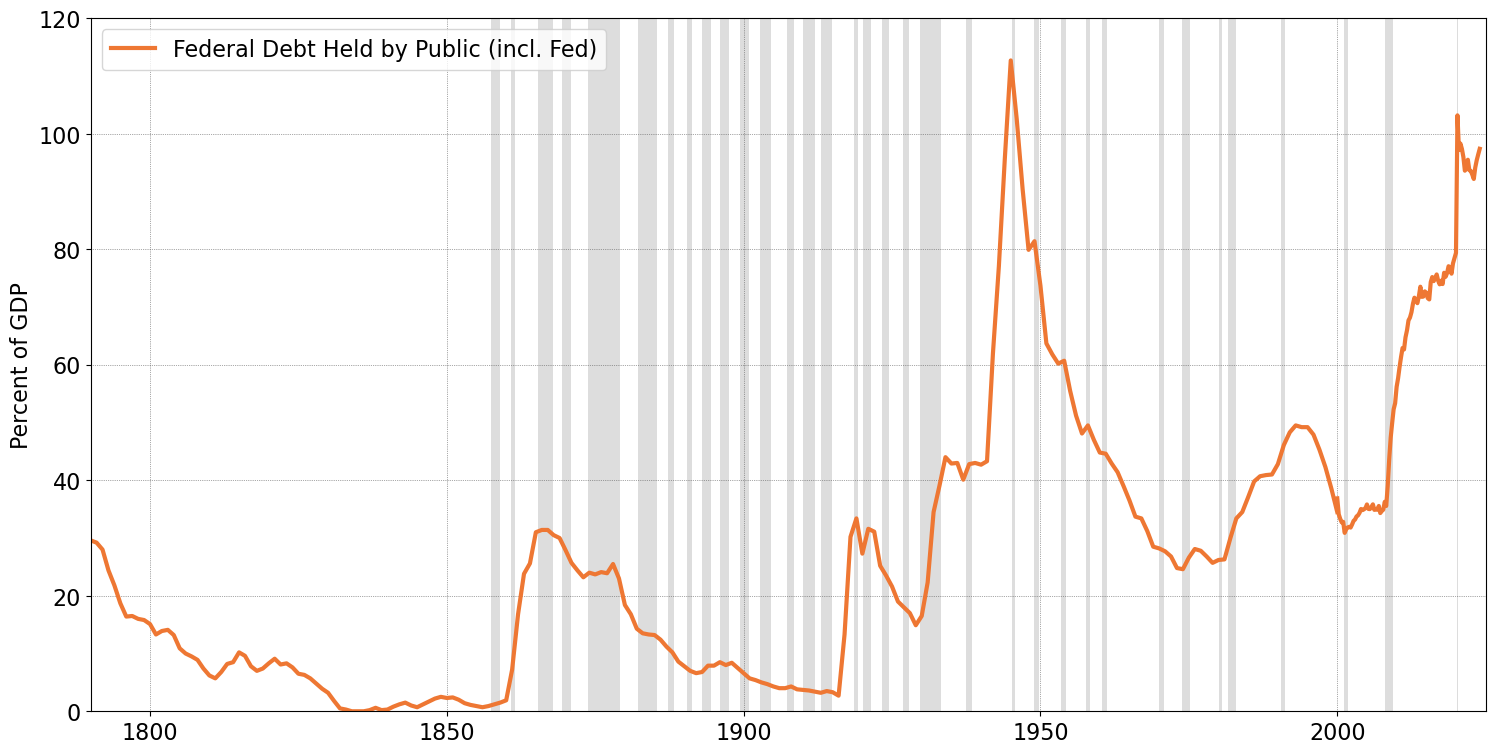

In [15]:
# CBO data until 2000, remaining data from FRED
data_CBO_orig = pd.read_excel('https://www.cbo.gov/sites/default/files/cbofiles/ftpdocs/117xx/doc11766/historicaldebt2000.xls',sheet_name="Sheet1").to_numpy()
id_years = np.where(data_CBO_orig[:,0]*0 == 0,True,False)
data_CBO = dict()
data_CBO['year'] = data_CBO_orig[id_years,0]
data_CBO['debt_GDP'] = data_CBO_orig[id_years,1]
data_CBO['nominal_GDP'] = data_CBO_orig[id_years,2]
data_CBO['real_GDP'] = data_CBO_orig[id_years,3]

data = ec.LoadDataFRED(series=['GFDEGDQ188S','FYGFGDQ188S','HBFRGDQ188S'],transform='none')
# Federal Debt: Total Public Debt as Percent of Gross Domestic Product (GFDEGDQ188S)
# Federal Debt Held by the Public as Percent of Gross Domestic Product (FYGFGDQ188S)
# Federal Debt Held by Federal Reserve Banks as Percent of Gross Domestic Product (HBFRGDQ188S)

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1790,2025], 'ylim': [0,120],
         'xlabel': '', 'ylabel': 'Percent of GDP',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,120]}

fig,ax = ec.GenerateTSPlot(param)

# data variable constructed in previous block - use for plotting data since 2000
ax.plot(data['year'][data['year']>=2000],data['FYGFGDQ188S'][data['year']>=2000],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Federal Debt Held by Public (incl. Fed)')
ax.plot(data_CBO['year'],data_CBO['debt_GDP'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'])
x = ax.legend(loc='upper left')


## Eurostat

Government finances of European Union countries from the <a href="https://ec.europa.eu/eurostat/data/database">Eurostat database</a>.

In [16]:
# render graphs within notebook
%matplotlib inline
# load econutil package with some frequently used functions
import econutil as ec
# import other packages
import eurostat
import numpy as np
import pandas as pd
import datetime

In [17]:
# download the table from https://ec.europa.eu/eurostat/databrowser/view/GOV_10DD_EDPT1/default/table?lang=en
data_Eurostat = eurostat.get_data('gov_10dd_edpt1')

In [18]:
# create a dataframe for covenient processing from the downloaded data which was organized as a list
df_Eurostat = pd.DataFrame(np.transpose(data_Eurostat))
# use first column as index
df_Eurostat = df_Eurostat.set_index(0)
df_Eurostat.index.name = None
# create column names from the first four rows
df_Eurostat.columns=pd.MultiIndex.from_arrays(df_Eurostat.iloc[0:5].values)
# erase first four rows
df_Eurostat = df_Eurostat.iloc[5:]
# sort by year
df_Eurostat = df_Eurostat.sort_index()

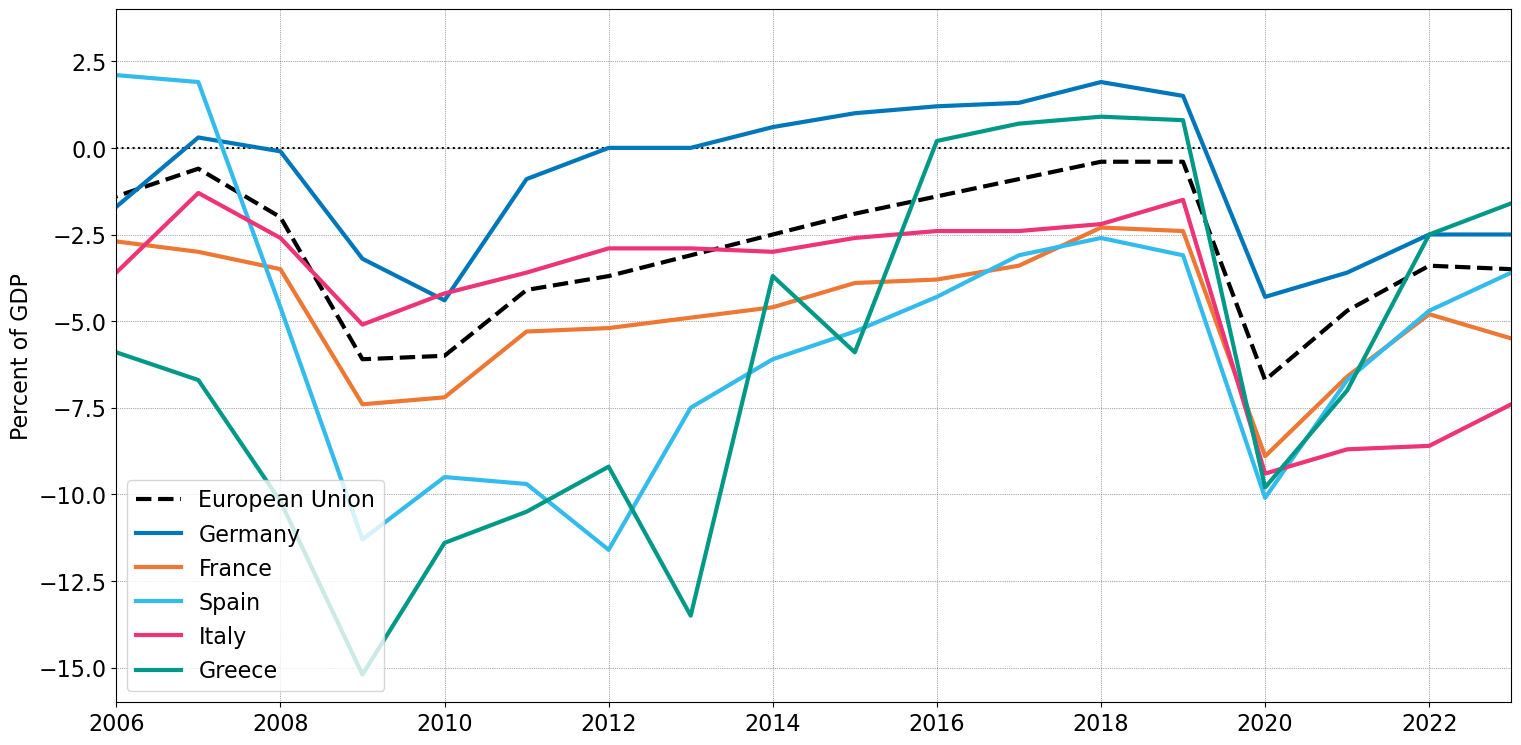

In [19]:
# process data - deficits
country_list = {'European Union':'EU27_2020',
                #'Euro area':'Euro area - 19 countries  (from 2015)',
                'Germany':'DE',
                'France':'FR',
                'Spain':'ES',
                'Italy':'IT',
                'Greece':'EL'}
d_def={}

# extract data for the variable of interest, according to the table coding
# A - frequency - annual
# PC_GDP - unit of measure - Percentage of gross domestic product (GDP)
# S13 - sector - general government
# B9 - national accounts indicator (ESA 2010) - Net lending (+) /net borrowing (-)
d_def_frame = df_Eurostat.loc[:,('A','PC_GDP','S13','B9',slice(None))]
var = ['A','PC_GDP','S13','B9','']

param = {'title': '', 'figsize' : [18,9],
         'xlim': [2006,2023], 'ylim': [-16,4],
         'xlabel': '', 'ylabel': 'Percent of GDP',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': False, 'showNBERrecessions_y': [-30,5]}

fig,ax = ec.GenerateTSPlot(param)

#d_def_frame = df_Eurostat.loc[:,('Net lending (+) /net borrowing (-)','Percentage of gross domestic product (GDP)','General government',slice(None))]
#var = ['Net lending (+) /net borrowing (-)','Percentage of gross domestic product (GDP)','General government','','Annual']

for ind,i in enumerate(country_list):
    var[4] = country_list[i]
    d_def[i] = d_def_frame.loc[:,tuple(var)].to_numpy()
    if ind == 0:
        ax.plot(d_def_frame.index.astype('float'),d_def[i],
                            '--',linewidth=3,marker='',color='#000000',label=i)
    else:
        ax.plot(d_def_frame.index.astype('float'),d_def[i],
                            '-',linewidth=3,marker='',color=ec.clist_vibrant[ind-1],label=i)
    
ax.legend(loc='lower left');


In [20]:
# process data - debt
d_debt={}

# extract data for the variable of interest, according to the table coding
# A - frequency - annual
# PC_GDP - unit of measure - Percentage of gross domestic product (GDP)
# S13 - sector - general government
# GD - national accounts indicator (ESA 2010) - Government consolidated gross debt
d_debt_frame = df_Eurostat.loc[:,('A','PC_GDP','S13','GD',slice(None))]
var = ['A','PC_GDP','S13','GD','']

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1995,2023], 'ylim': [0,220],
         'xlabel': '', 'ylabel': 'Percent of GDP',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [-30,5]}

fig,ax = ec.GenerateTSPlot(param)

for ind,i in enumerate(country_list):
    var[4] = country_list[i]
    d_debt[i] = d_debt_frame.loc[:,tuple(var)].to_numpy()
    if ind == 0:
        ax.plot(d_debt_frame.index.astype('float'),d_debt[i],
                            '--',linewidth=3,marker='',color='#000000',label=i)
    else:
        ax.plot(d_debt_frame.index.astype('float'),d_debt[i],
                            '-',linewidth=3,marker='',color=ec.clist_vibrant[ind-1],label=i)
    
ax.plot(param['xlim'],[60,60],':',linewidth=3,marker='',color=ec.tolColor['tolVibrantGrey'],label='Maastricht Criteria Limit')
ax.legend(loc='upper left');

## OECD

Economic data from the <a href="https://stats.oecd.org/">Organisation for Economic Co-operation and Development database</a>. The <tt>OECDReaderSeries</tt> function used to download individual series is experimental and should be used with caution. The standard <tt>OECDReader</tt> function downloads whole datasets that are often very large and downloads may time out.

In [21]:
# render graphs within notebook
%matplotlib inline
# load econutil package with some frequently used functions
import econutil as ec
# import other packages
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime

In [22]:
import pandas as pd
import ssl
import urllib.request

# data_def = ec.OECDReaderSeriesCSV("NAAG/.B9S13S/all?startTime=2006&endTime=2023")
# data_growth = ec.OECDReaderSeriesCSV("NAAG/.GDPG/all?startTime=2006&endTime=2023")

data_def = ec.OECDReaderSeriesCSV2(dataflow='DSD_NAAG_VI@DF_NAAG_EXP', filter='A..B9S13..PT_B1GQ.', startPeriod='2009', endPeriod='2009', format='csvfilewithlabels')
data_growth = ec.OECDReaderSeriesCSV2(dataflow='DSD_NAAG@DF_NAAG_I', filter='A..B1GQ_R_GR.PC.', startPeriod='2009', endPeriod='2009', format='csvfilewithlabels')

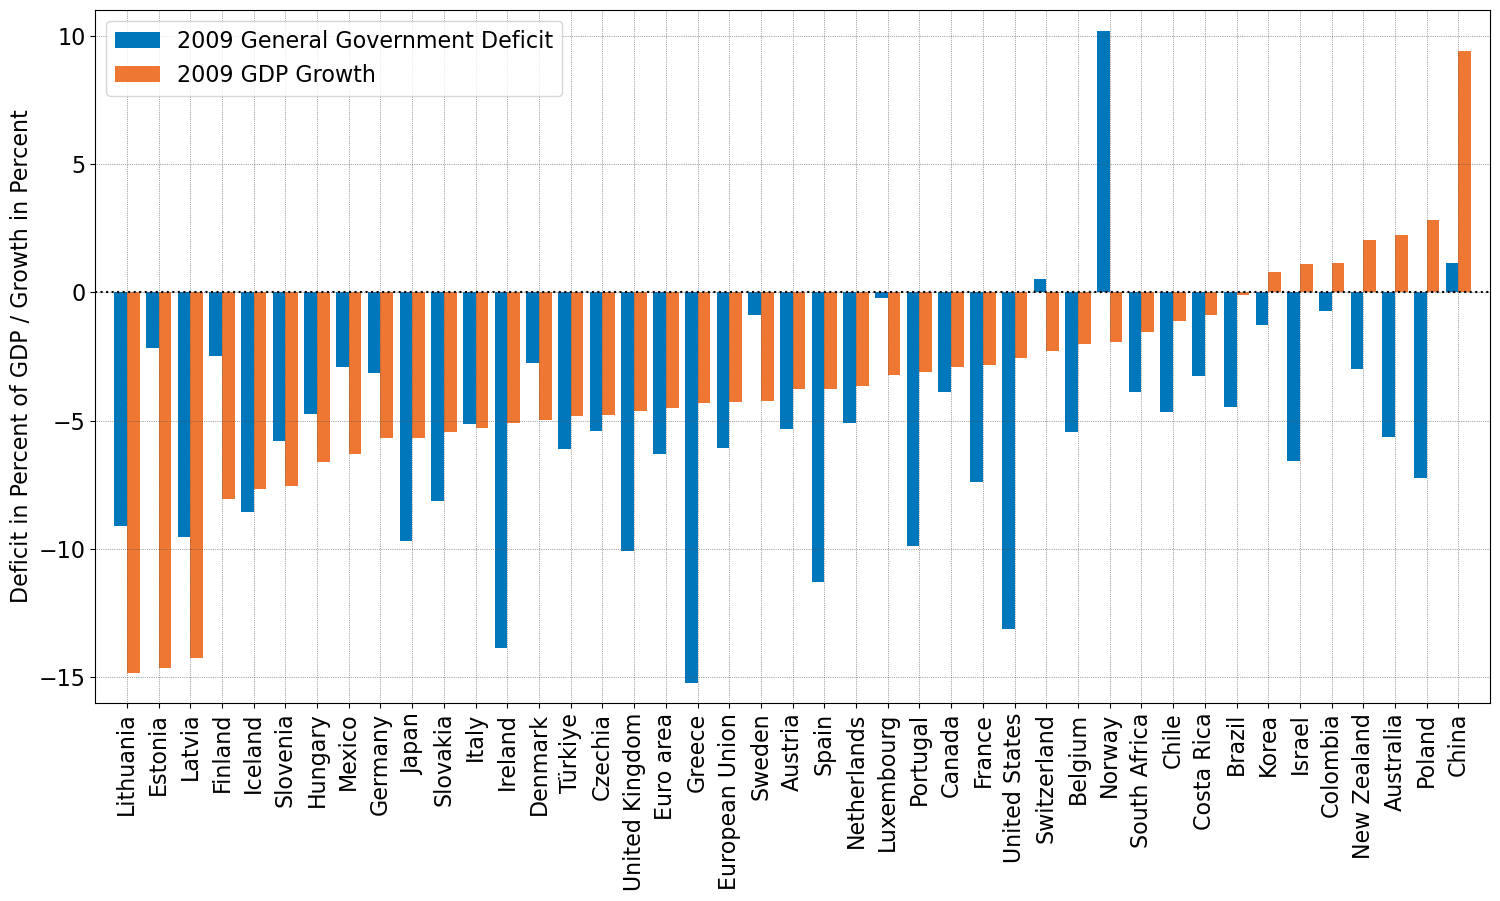

In [23]:
def_year2009ind = np.where(data_def['TIME_PERIOD'] == 2009)
def_year2009 = data_def['OBS_VALUE'].to_numpy()[def_year2009ind]
def_country_names = data_def['Reference area'].to_numpy()[def_year2009ind]

growth_year2009ind = np.where(data_growth['TIME_PERIOD'] == 2009)
growth_year2009 = data_growth['OBS_VALUE'].to_numpy()[growth_year2009ind]
growth_country_names = data_growth['Reference area'].to_numpy()[growth_year2009ind]

# merge data for growth and deficits
country_names_set = set(def_country_names).intersection(set(growth_country_names))
data = {'country_names':[], 'deficit':[], 'growth':[]}

for ind,cname in enumerate(country_names_set):
    def_ind = np.where(def_country_names == cname)[0].astype('int')
    growth_ind = np.where(growth_country_names == cname)[0].astype('int')
    if not(np.isnan(def_year2009[def_ind])) and not(np.isnan(growth_year2009[growth_ind])):
        data['country_names'].append(cname)
        data['deficit'].append(float(def_year2009[def_ind[0]]))
        data['growth'].append(float(growth_year2009[growth_ind[0]]))

# rename some data
name_switch = [["China (People’s Republic of)",'China'],
               ['Slovak Republic','Slovakia'],
               ['Czech Republic','Czechia']]
for n in name_switch:
    for ind,old_name in enumerate(data['country_names']):
        if n[0]==old_name:
            data['country_names'][ind] = n[1]

# sort data
args = np.argsort(data['growth'])
data['deficit'] = [data['deficit'][i] for i in args]
data['growth'] = [data['growth'][i] for i in args]
data['country_names'] = [data['country_names'][i] for i in args]

N_data = len(data['country_names'])
loc_data = np.arange(N_data)

param = {'title': '','figsize' : [18,9],
         'xlim': [-1,N_data],'ylim': [-16,11],
         'xlabel': '', 'ylabel': 'Deficit in Percent of GDP / Growth in Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': False, 'showNBERrecessions_y': [-30,5]}

fig,ax = ec.GenerateBarPlot(param)
bar_width = 0.4

ax.bar(loc_data-bar_width/2,data['deficit'],bar_width,color=ec.tolColor['tolVibrantBlue'],label='2009 General Government Deficit')
ax.bar(loc_data+bar_width/2,data['growth'],bar_width,color=ec.tolColor['tolVibrantOrange'],label='2009 GDP Growth')
ax.set_xticks(ticks=np.linspace(0,N_data-1,len(data['country_names'])))
ax.set_xticklabels(data['country_names'],rotation='vertical');
ax.legend(loc='upper left');

# Long-Run Growth

## Maddison Project

Historical estimates of GDP per capita in Purchasing Power Parity terms from the <a href="https://www.rug.nl/ggdc/historicaldevelopment/maddison/">Maddison project</a> website.

In [24]:
# Maddison project data, 2023 version
data_Mad_orig_tab = pd.read_excel('https://dataverse.nl/api/access/datafile/421302',sheet_name="GDPpc")

data_Mad_orig = data_Mad_orig_tab.to_numpy()

In [25]:
id_years = np.where(data_Mad_orig[:,0]*0 == 0,True,False)
country_codes = data_Mad_orig[1,1:]
data_Mad_GDP_pc = data_Mad_orig[id_years,1:]
country_names = data_Mad_orig_tab.columns.to_numpy()
country_names = country_names[1:]

data_Mad = dict()
data_Mad['year'] = data_Mad_orig[id_years,0]
data_Mad['GDP_USA'] = data_Mad_GDP_pc[:,np.where(country_codes=='USA')[0][0]]

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1799,2023], 'ylim': [0,60000],
         'xlabel': '', 'ylabel': '2011 U.S. dollars',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,60000]}

fig,ax = ec.GenerateTSPlot(param)

# data variable constructed in previous block - use for plotting data since 2000
ax.plot(data_Mad['year'],data_Mad['GDP_USA'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='U.S. GDP per capita')
ax.legend(loc='upper left');

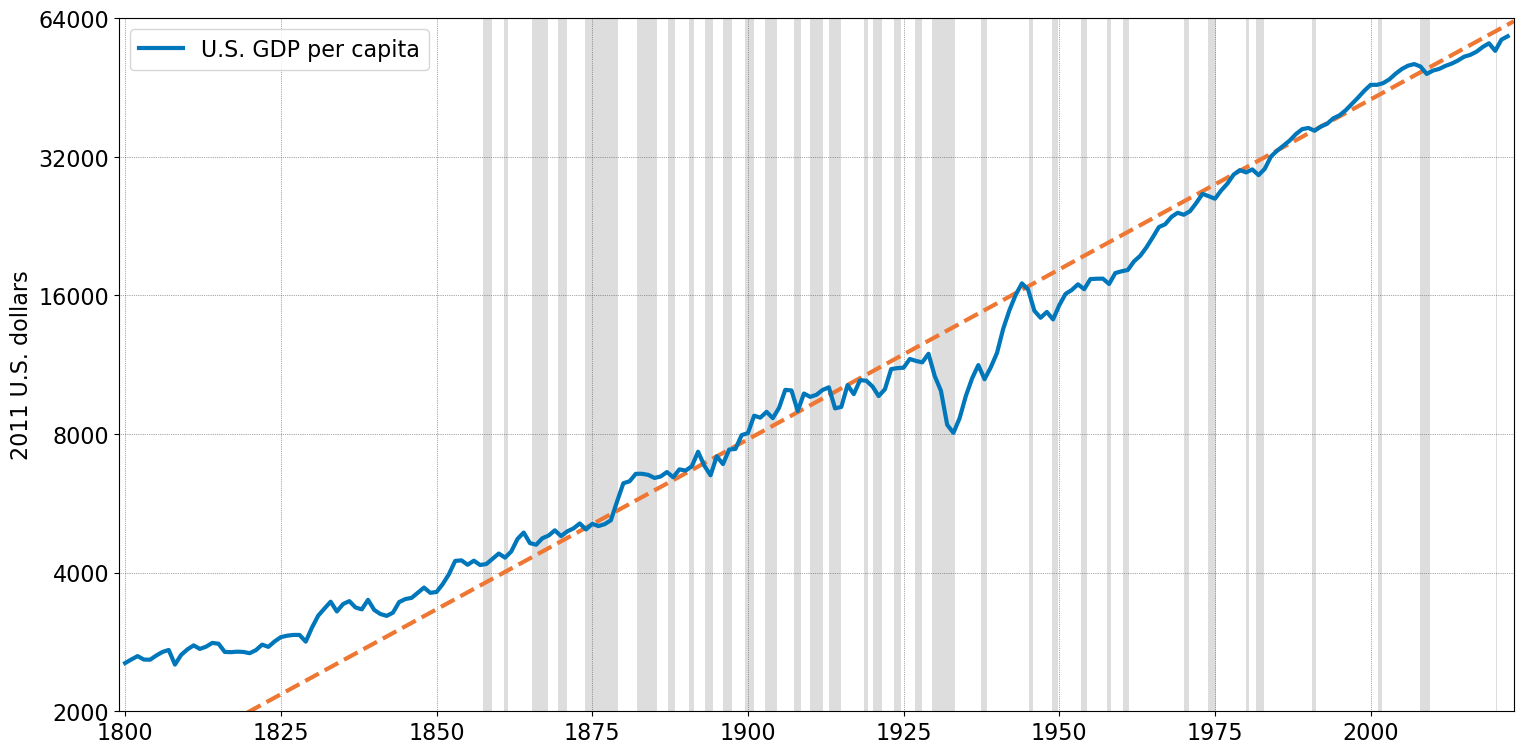

In [26]:
param = {'title': '', 'figsize' : [18,9],
         'xlim': [1799,2023], 'ylim': [2000,64000],
         'xlabel': '', 'ylabel': '2011 U.S. dollars',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,64000]}

fig,ax = ec.GenerateTSPlot(param)

# data variable constructed in previous block - use for plotting data since 2000
ax.plot(np.linspace(1800,2023,100),2000*np.exp(0.017*(np.linspace(1800,2023,100)-1820)),
        '--',linewidth=3,color=ec.tolColor['tolVibrantOrange'])
ax.plot(data_Mad['year'],data_Mad['GDP_USA'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='U.S. GDP per capita')
ax.minorticks_off()   
ax.set_yticks([2000,4000,8000,16000,32000,64000])

ax.legend(loc='upper left');

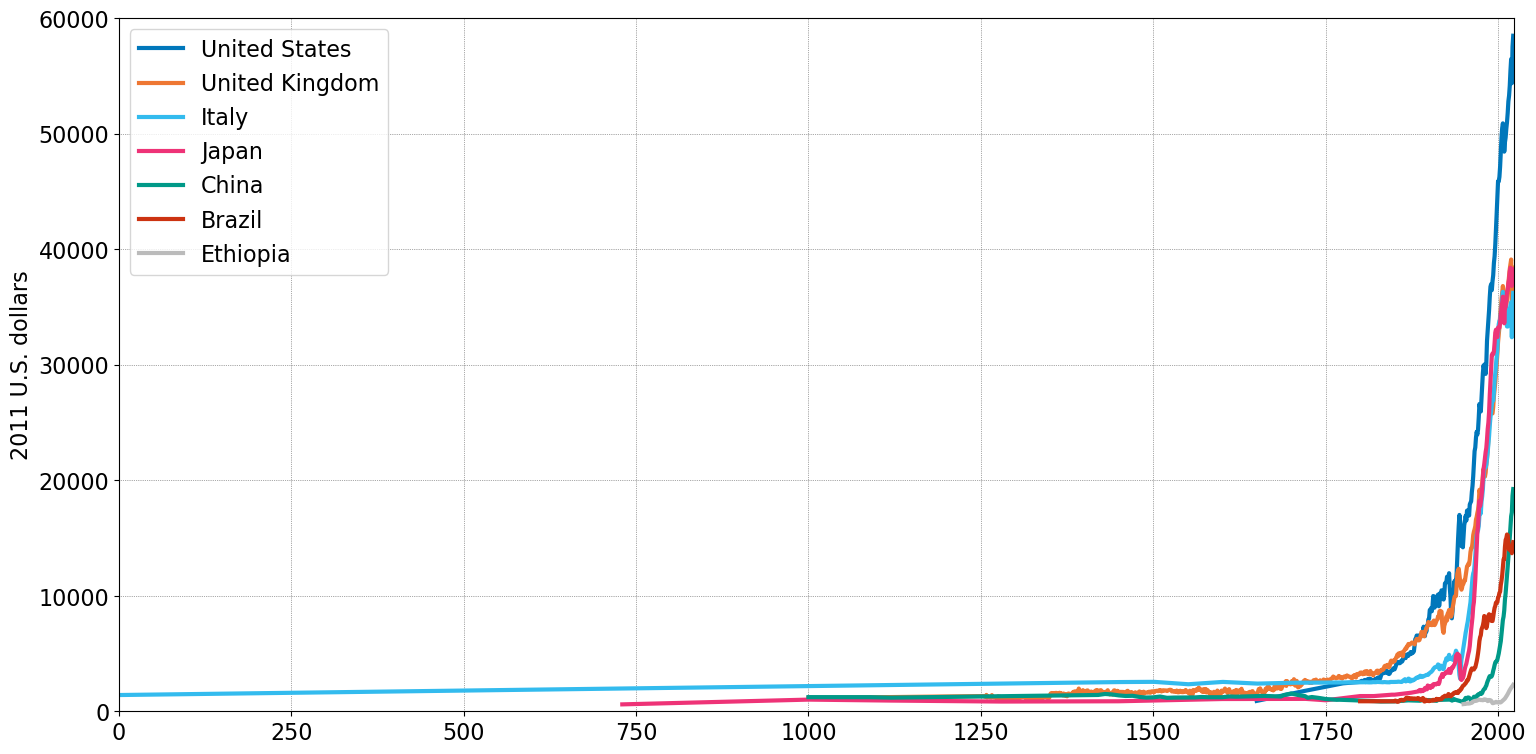

In [27]:
data_codes = ['USA','GBR','ITA','JPN','CHN','BRA','ETH']

data_GDP = dict()
for ind,c in enumerate(data_codes):
    ind_col = np.where(country_codes==c)
    data_GDP[c,'country_name'] = country_names[ind_col][0]
    col_GDP = data_Mad_GDP_pc[:,ind_col[0][0]]
    data_GDP[c,'year'] = data_Mad['year'][np.isnan(list(col_GDP))==False]
    data_GDP[c,'GDP'] = col_GDP[np.isnan(list(col_GDP))==False]

param = {'title': '', 'figsize' : [18,9],
         'xlim': [0,2023], 'ylim': [0,60000],
         'xlabel': '', 'ylabel': '2011 U.S. dollars',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [0,60000]}

fig,ax = ec.GenerateTSPlot(param)

for ind,c in enumerate(data_codes):
    ax.plot(data_GDP[c,'year'],data_GDP[c,'GDP'],
                        '-',linewidth=3,marker='',color=ec.clist_vibrant[ind],label=data_GDP[c,'country_name'] )
    
ax.legend(loc='upper left');    

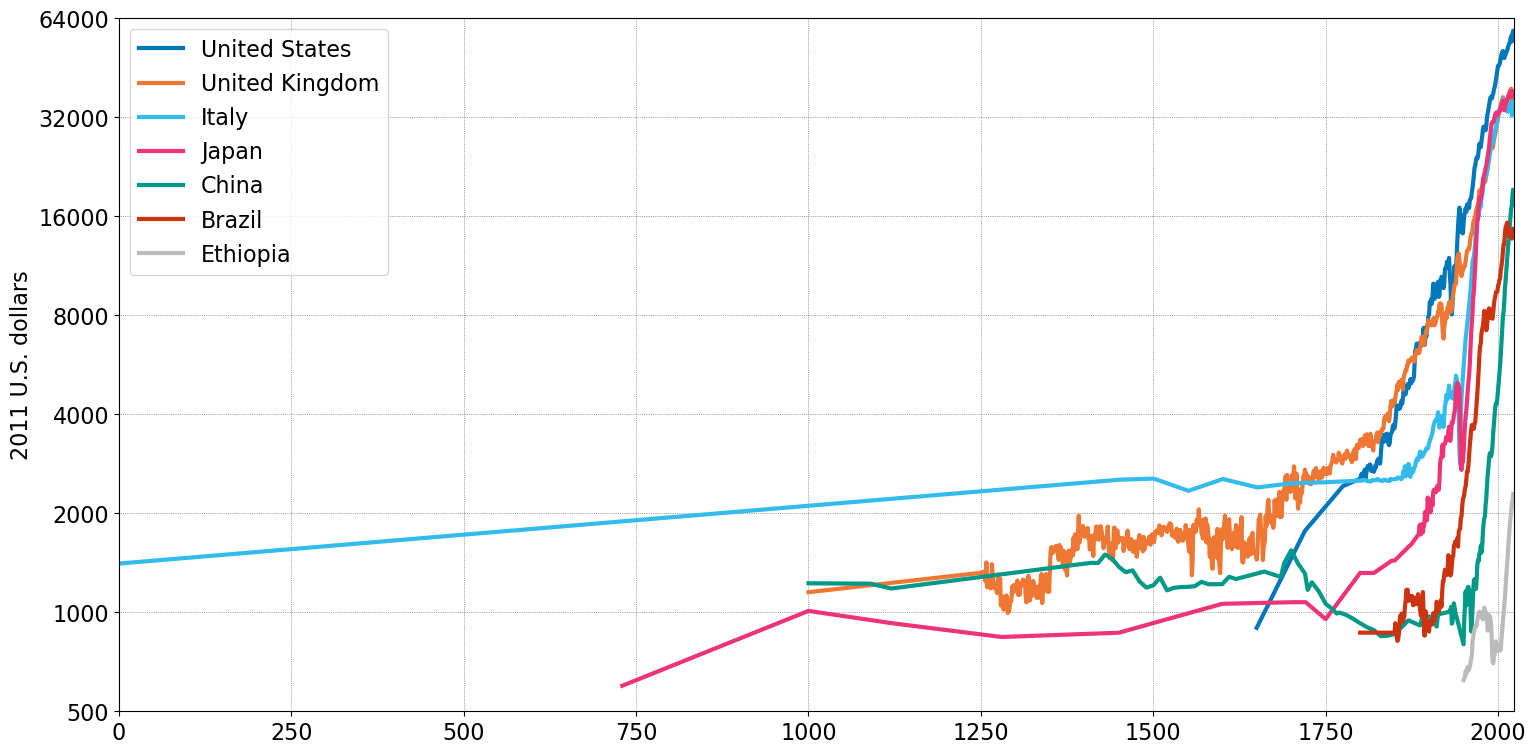

In [28]:
param = {'title': '', 'figsize' : [18,9],
         'xlim': [0,2023], 'ylim': [500,64000],
         'xlabel': '', 'ylabel': '2011 U.S. dollars',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [0,60000]}

fig,ax = ec.GenerateTSPlot(param)

for ind,c in enumerate(data_codes):
    ax.plot(data_GDP[c,'year'],data_GDP[c,'GDP'],
                        '-',linewidth=3,marker='',color=ec.clist_vibrant[ind],label=data_GDP[c,'country_name'] )

ax.minorticks_off()   
ax.set_yticks([500,1000,2000,4000,8000,16000,32000,64000])
ax.legend(loc='upper left');    

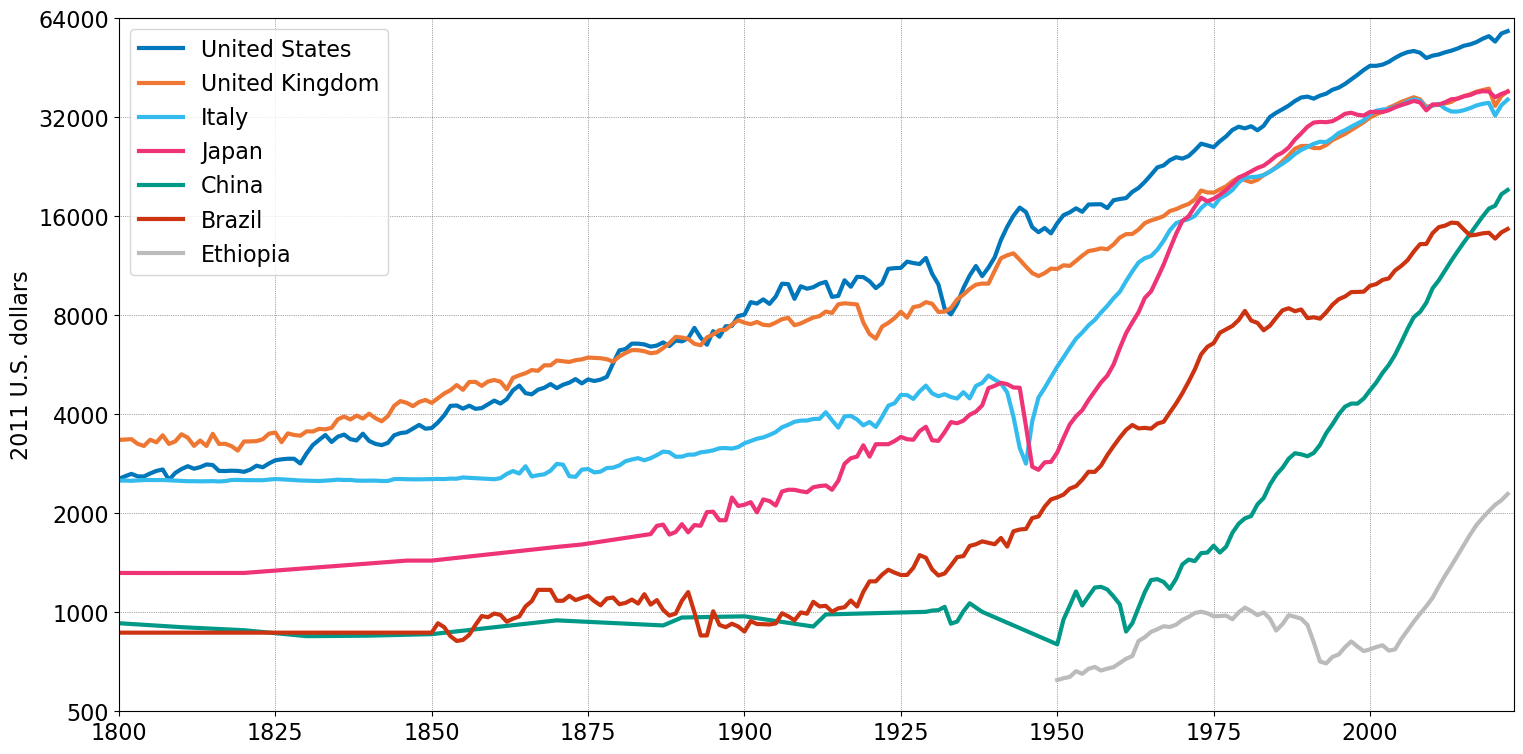

In [29]:
param = {'title': '', 'figsize' : [18,9],
         'xlim': [1800,2023], 'ylim': [500,64000],
         'xlabel': '', 'ylabel': '2011 U.S. dollars',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [0,60000]}

fig,ax = ec.GenerateTSPlot(param)

for ind,c in enumerate(data_codes):
    ax.plot(data_GDP[c,'year'],data_GDP[c,'GDP'],
                        '-',linewidth=3,marker='',color=ec.clist_vibrant[ind],label=data_GDP[c,'country_name'] )

ax.minorticks_off()   
ax.set_yticks([500,1000,2000,4000,8000,16000,32000,64000])
ax.legend(loc='upper left');    

## Maddison project - regional data

In [30]:
# Maddison project data, 2023 version
data_Mad_reg_tab = pd.read_excel('https://dataverse.nl/api/access/datafile/421302',sheet_name="Regional data")
data_Mad_reg = data_Mad_reg_tab.to_numpy()

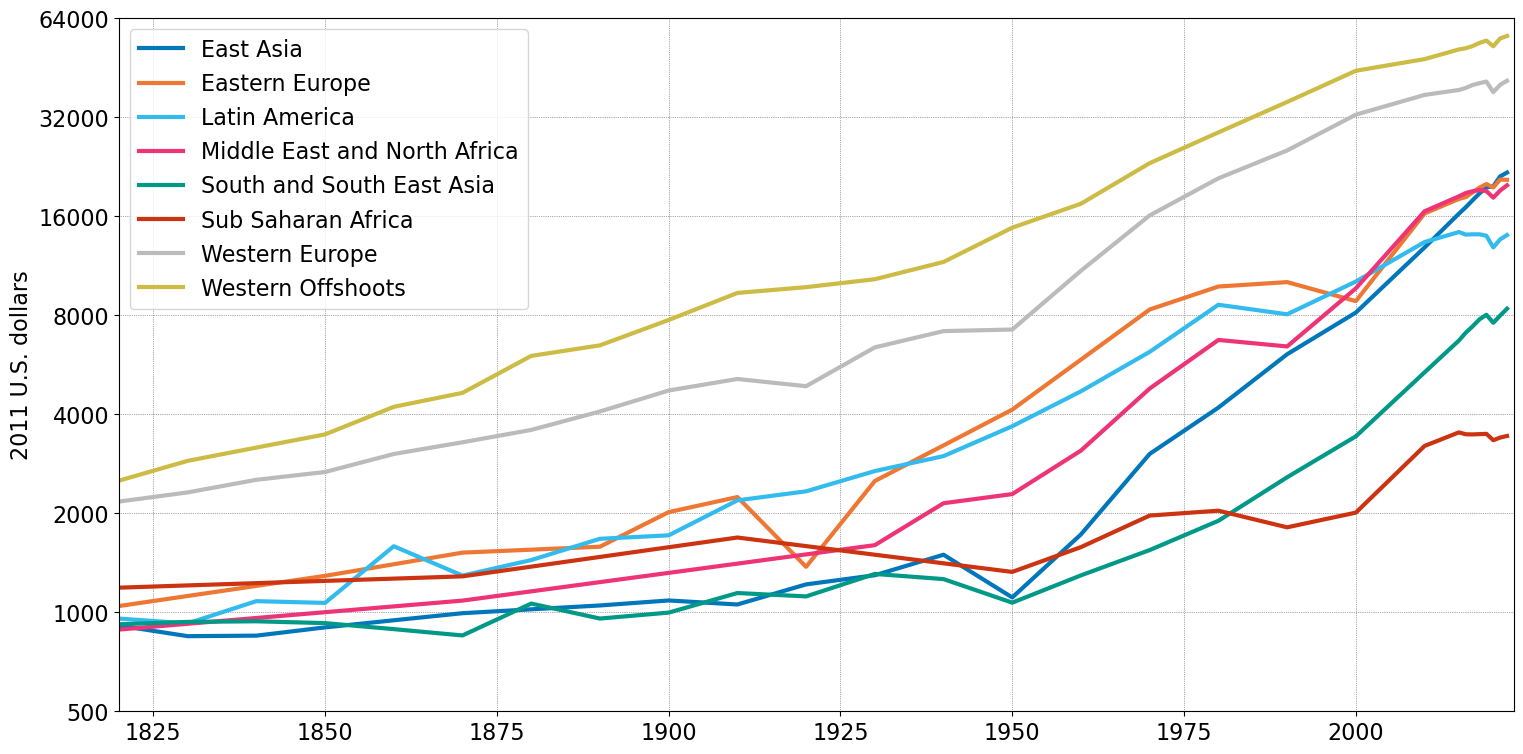

In [31]:
id_years = np.where(data_Mad_reg[:,0]*0 == 0,True,False)
region_codes = data_Mad_reg[0,1:9] # all regions
data_Mad_reg_GDP_pc = data_Mad_reg[id_years,1:9]
data_Mad_reg_year = data_Mad_reg[id_years,0]

region_names = region_codes        # selected regions
data_GDP = dict()
for ind,n in enumerate(region_names):
    ind_col = np.where(region_codes==n)
    data_GDP[n,'region_name'] = region_codes[ind_col][0]
    col_GDP = data_Mad_reg_GDP_pc[:,ind_col[0][0]]
    data_GDP[n,'year'] = data_Mad_reg_year[np.isnan(list(col_GDP))==False]
    data_GDP[n,'GDP'] = col_GDP[np.isnan(list(col_GDP))==False]

param = {'title': '', 'figsize' : [18,9],
         'xlim': [1820,2023], 'ylim': [500,60000],
         'xlabel': '', 'ylabel': '2011 U.S. dollars',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [0,60000]}

fig,ax = ec.GenerateTSPlot(param)

for ind,n in enumerate(region_names):
    ax.plot(data_GDP[n,'year'],data_GDP[n,'GDP'],
                        '-',linewidth=3,marker='',color=ec.clist_vibrant[ind],label=data_GDP[n,'region_name'] )
    
ax.minorticks_off()   
ax.set_yticks([500,1000,2000,4000,8000,16000,32000,64000])
ax.legend(loc='upper left'); 
